In [19]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import math # for exp()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

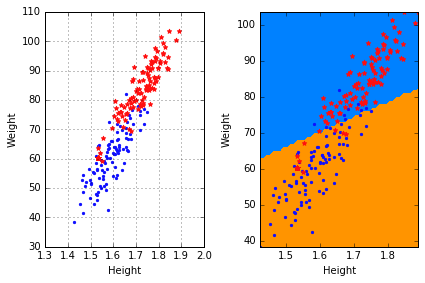

In [8]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    loss, w = least_squares(y, tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute your cost by negative log likelihood.

Sigmoid function : $ f(x)=\frac{1}{1 + e^{-x}} $

In [133]:


def sigmoid(t):
    """apply sigmoid function on t.
    Apply it to each row of the vecotr given in input
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    y = np.zeros((t.shape[0],1))
    for i in range(t.shape[0]):
        y[i] = math.exp(t[i]) / (1 + math.exp(t[i]))

    return y

sigmoid(np.array([0, 1, 2]) - [1, 1, 1])

array([[ 0.26894142],
       [ 0.5       ],
       [ 0.73105858]])

Log - likelihood : $L(w) = \Sigma ln[1 + exp(x>n w)]   yynx>n w $

In [134]:
tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx.shape[1], 1))

def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    L = 0
    for i in range(x.shape[0]):
#         print("loss tx and w:")
#         print(tx)
#         print(w)
#         print("shape tx", tx.shape, "shape w", w.shape)
        exp = math.exp(tx[i] @ w)
        log_n = np.log(1 + exp)
        yxw = y[i] * tx[i].T @ w
        L += log_n - yxw
        
    return L

calculate_loss(y, tx, w)

array([ 138.62943611])

In [136]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    grad = tx.T @ (np.subtract(sigmoid(tx @ w),y))
#     print(sigmoid(tx @ w).shape)
#     print(y.shape)
#     print((sigmoid(tx @ w) - y).shape)
#     print(np.subtract(sigmoid(tx @ w),y).shape)
#     print(tx.T.shape)
    return grad

calculate_gradient(y, tx, w)

array([[ -2.        ],
       [ 68.74603697],
       [ 79.61302092]])

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [139]:
def learning_by_gradient_descent(y, tx, w, alpha):
    """
    Do one step of gradient descen using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the cost: TODO
    # ***************************************************
    loss = calculate_loss(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    grad = calculate_gradient(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
#     print("------------")
#     print("w before", w.shape)
#     print("grad", grad.shape)
#     print("alpha", alpha)
#     print("alpha * grad", (alpha * grad).shape)
    w = w - (alpha * grad)
#     print("w after", w.shape)
    
    return loss, w

Demo!

In [140]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    alpha = 0.001
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))
    
#     print(tx.shape)
#     print(w.shape)

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, alpha)
        # log info
        if iter % 1000 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Current iteration=0, the loss=[ 138.62943611]
Current iteration=1000, the loss=[ 43.49258275]
Current iteration=2000, the loss=[ 41.55453652]
Current iteration=3000, the loss=[ 41.10170781]
Current iteration=4000, the loss=[ 40.96605044]
Current iteration=5000, the loss=[ 40.92056156]
Current iteration=6000, the loss=[ 40.90438018]
Current iteration=7000, the loss=[ 40.89842938]
Current iteration=8000, the loss=[ 40.89619782]
Current iteration=9000, the loss=[ 40.89535113]
The loss=[ 40.89502758]


Calculate your hessian below

$H(w) := X^t S X$

In [166]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate hessian: TODO
    # ***************************************************
    
    sigmo = sigmoid(tx @ w)
    one_vec = np.ones((len(sigmo),1))
    minus_sigmo = (np.subtract(one_vec,sigmo))
#     print(sigmo.shape)
#     print(one_vec.shape)
#     print(minus_sigmo.shape)
    S_array = np.multiply(sigmo, minus_sigmo)
#     print(S_array.shape)
    S = np.diag(S_array[:,0])
#     print(S)

#     print(tx.shape)
#     print(tx.T.shape)
#     print(S.shape)
#     print((tx.T @ S).shape)
    H = tx.T @ S @ tx
    return H
    
calculate_hessian(y, tx, w)

array([[  5.00000000e+01,  -7.79376563e-14,   7.69384556e-14],
       [ -7.79376563e-14,   5.00000000e+01,   4.60676209e+01],
       [  7.69384556e-14,   4.60676209e+01,   5.00000000e+01]])

Write a function below to return loss, gradient, and hessian.

In [170]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    
    return loss, grad, hessian

### Using Newton method
Use Newton method for logistic regression.

In [171]:
def learning_by_newton_method(y, tx, w, alpha):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    loss, grad, hessian = logistic_regression(y, tx, w)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - alpha * np.linalg.inv(hessian) @ grad
    return loss, w

demo

In [172]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 10000
    alpha = 0.01
    threshold = 1e-8
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, alpha)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

Current iteration=0, the loss=[ 138.62943611]
Current iteration=500, the loss=[ 40.96438279]
Current iteration=1000, the loss=[ 40.89482895]
The loss=[ 40.89482609]


### Using penalized logistic regression
Fill in the function below.

In [178]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient, and hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and hessian: TODO
    # ***************************************************
    penalty = lambda_ * (w.T @ w)
    
    loss = calculate_loss(y, tx, w) + penalty
    grad = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    
    return loss, grad, hessian
    
penalized_logistic_regression(y, tx, w, 0.1)

(array([[ 138.62943611]]), array([[ -2.        ],
        [ 68.74603697],
        [ 79.61302092]]), array([[  5.00000000e+01,  -7.79376563e-14,   7.69384556e-14],
        [ -7.79376563e-14,   5.00000000e+01,   4.60676209e+01],
        [  7.69384556e-14,   4.60676209e+01,   5.00000000e+01]]))

In [185]:
def learning_by_penalized_gradient(y, tx, w, alpha, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and hessian: TODO
    # ***************************************************
    loss, grad, hessian = penalized_logistic_regression(y, tx, w, lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    w = w - alpha * np.linalg.inv(hessian) @ grad
    return loss, w

In [186]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    alpha = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, alpha, lambda_)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent")
    print("The loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)

Current iteration=0, the loss=[[ 138.62943611]]
Current iteration=500, the loss=[[ 45.86082563]]
Current iteration=1000, the loss=[[ 46.3962591]]
Current iteration=1500, the loss=[[ 46.40068609]]
The loss=[ 40.89482561]
